In [ ]:

import pandas as pd

# on spécifie le chemin du fichier
fichier_excel = '/content/sample_data/Profils.xlsx'

#lire le fichier excel
data = pd.read_excel(fichier_excel)

print(data)


In [ ]:
import pandas
D = pandas.read_excel("/content/sample_data/Profils.xlsx",sheet_name=0,header=0,index_col=0)
#vérifications des colonnes
print(D.info())

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, BEN to VID
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BEN     25 non-null     float64
 1   BES     25 non-null     float64
 2   BOU     25 non-null     float64
 3   BRU     25 non-null     float64
 4   CAM     25 non-null     float64
 5   CHU     25 non-null     float64
 6   DUC     25 non-null     float64
 7   LAN     25 non-null     float64
 8   LEX     25 non-null     float64
 9   MAR     25 non-null     float64
 10  ROG     25 non-null     float64
 11  ROS     25 non-null     float64
 12  TOS     25 non-null     float64
 13  BAR     25 non-null     float64
 14  BEL     25 non-null     float64
 15  CAL     25 non-null     float64
 16  DIF     25 non-null     float64
 17  FIR     25 non-null     float64
 18  FRE     25 non-null     float64
 19  FUM     25 non-null     float64
 20  HAD     25 non-null     float64
 21  HEL     25 non-null     float64
 22  MZA   

print(D.index
      )

In [ ]:
from sklearn import manifold

#mds
mds = manifold.MDS(n_components=2,random_state=1,dissimilarity="precomputed")
#apprentissage
mds.fit(D)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


MDS(dissimilarity='precomputed', random_state=1)

In [ ]:
#coordonées des points dans le plan puisque (n_components=2)

points=mds.embedding_
print(points)

[[ 0.60523707  1.1468044 ]
 [-1.49693267 -0.83407788]
 [ 0.63323177  1.39263585]
 [ 0.0414655  -0.80101129]
 [-0.22663826 -0.67679576]
 [-1.18574994 -0.55823329]
 [-1.45642689 -0.94930949]
 [ 1.52249086 -0.94861426]
 [ 1.05437744  0.34090295]
 [ 0.94565596  1.85559092]
 [ 1.63685835  1.1261973 ]
 [-1.08392447 -1.03915319]
 [-1.15952041  1.09754559]
 [ 0.79597211 -1.84919836]
 [-0.46053848  0.84501407]
 [-0.86363017  1.32077614]
 [ 0.68830739 -1.12616027]
 [ 0.10831439 -0.87341874]
 [ 0.52752546 -0.72365751]
 [-0.34610638  0.97662   ]
 [-0.89926011  0.84508419]
 [ 0.21037635 -1.48529244]
 [ 0.42104059  0.99613963]
 [ 1.20188218 -1.43807234]
 [-1.21400764  1.35968378]]


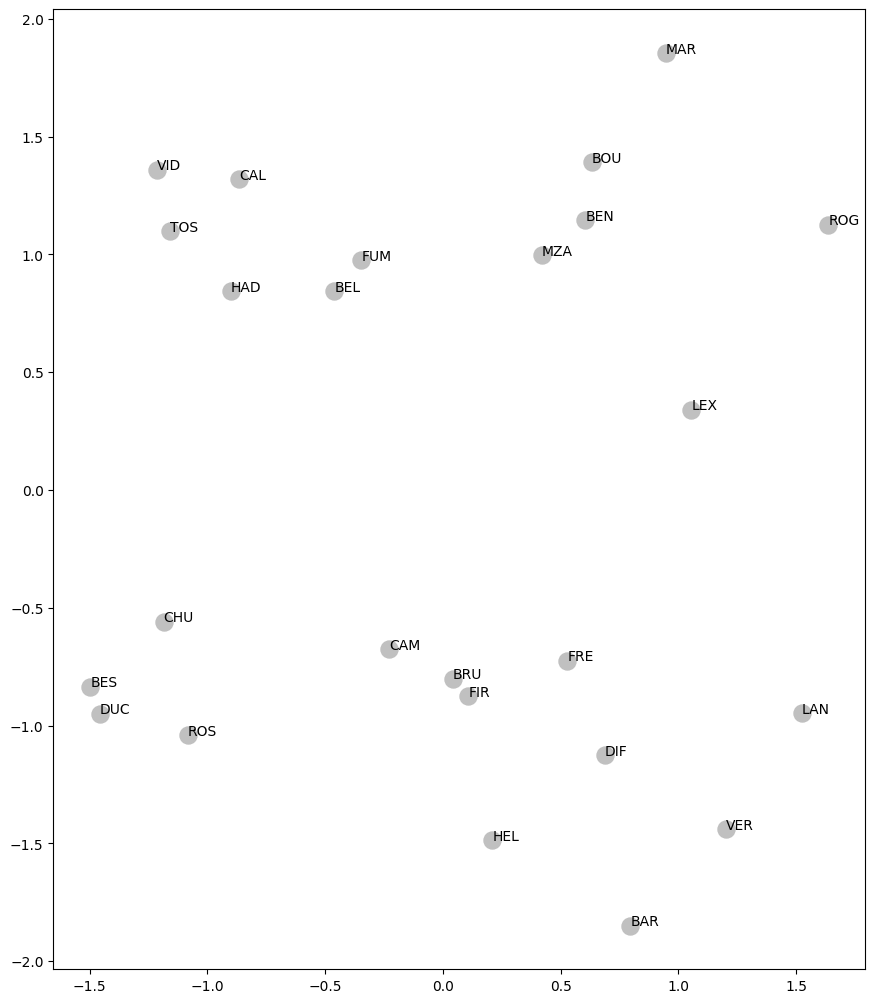

In [ ]:
#librairie graphique
import matplotlib.pyplot as plt
#définir la taille du graphique
ax = plt.axes([0,0,2,2])
#ajuster le ratio abscisse ‐ ordonnée
ax.set_aspect(aspect='equal')
#placer les points dans le plan (abscisse, ordonnée)
plt.scatter(points[:,0],points[:,1],color='silver',s=150)
#ajouter les étiquettes dans le graphique
for i in range(D.shape[0]):
    ax.annotate(D.index[i], (points[i,0], points[i,1]), color='black')
#afficher le graphique
plt.show()

In [ ]:
#qualité ‐‐‐ valeur du stress MDS
print(mds.stress_)

107.87240219831337


In [ ]:
#calculer les distances entre paires d'individus dans le plan
from sklearn.metrics import euclidean_distances
DE = euclidean_distances(points)
print(DE.shape) # matrice (25, 25)
#distances estimées entre paires d’individus ‐‐ 5 premières lignes et colonnes
print(DE[0:5,0:5])

(25, 25)
[[0.         2.88842729 0.2474203  2.02776339 2.00437874]
 [2.88842729 0.         3.08153445 1.53875349 1.27999435]
 [0.2474203  3.08153445 0.         2.27206406 2.2409649 ]
 [2.02776339 1.53875349 2.27206406 0.         0.29548117]
 [2.00437874 1.27999435 2.2409649  0.29548117 0.        ]]


In [ ]:
#calculer les distances entre paires d'individus dans le plan
from sklearn.metrics import euclidean_distances
DE = euclidean_distances(points)
print(DE.shape) # matrice (25, 25)
#distances estimées entre paires d’individus ‐‐ 5 premières lignes et colonnes
print(DE[0:5,0:5])

(25, 25)
[[0.         2.88842729 0.2474203  2.02776339 2.00437874]
 [2.88842729 0.         3.08153445 1.53875349 1.27999435]
 [0.2474203  3.08153445 0.         2.27206406 2.2409649 ]
 [2.02776339 1.53875349 2.27206406 0.         0.29548117]
 [2.00437874 1.27999435 2.2409649  0.29548117 0.        ]]


In [ ]:
import numpy as np

# Supposons que vous avez déjà calculé ou obtenu une valeur de stress
stress = 100 # Remplacez 100 par la valeur réelle que vous avez

# Maintenant, vous pouvez calculer stress1
stress1 = np.sqrt(stress / (0.5 * np.sum(D.values**2)))
print(stress1)


0.2618465060531822


In [ ]:
#K‐means
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4,random_state=1)
#modélisation
km.fit(points)
#barycentres
print(km.cluster_centers_)

[[-0.82384387  1.07412063]
 [ 0.54107733 -1.102469  ]
 [ 0.88273353  1.14304518]
 [-1.30575849 -0.84519346]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


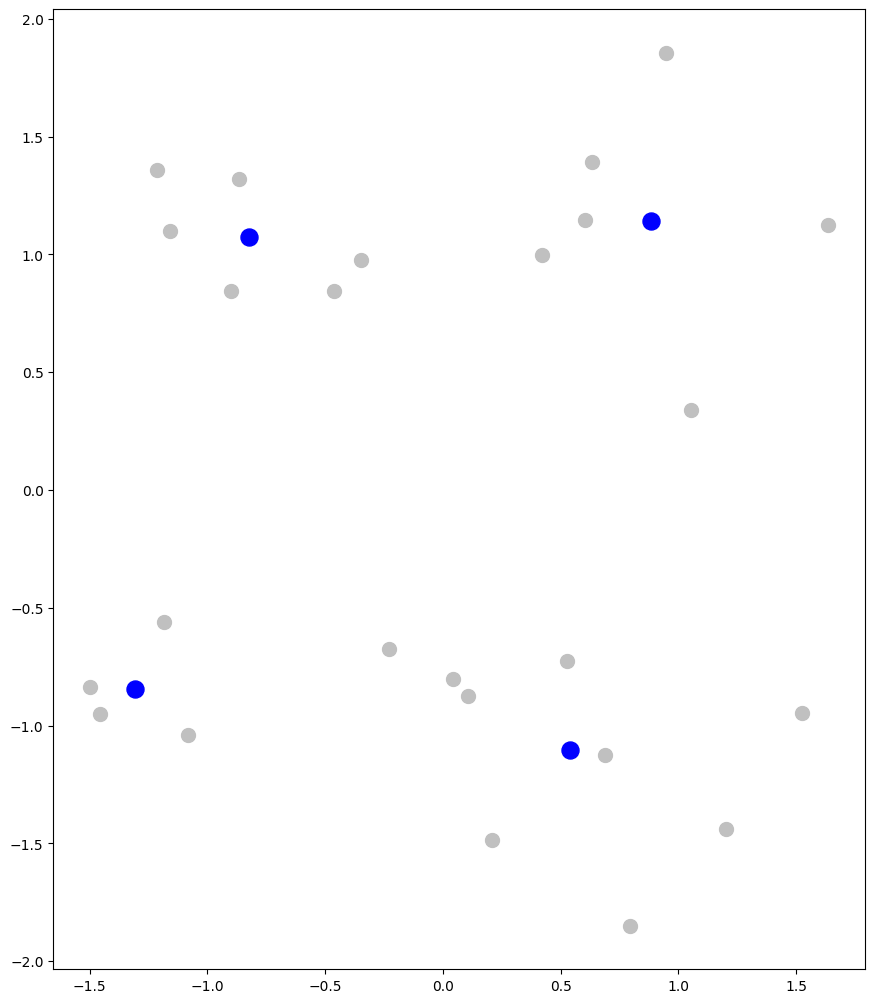

In [ ]:
#graphique avec les barycentres
import matplotlib.pyplot as plt
ax = plt.axes([0,0,2,2])
ax.set_aspect(aspect='equal')
plt.scatter(points[:,0],points[:,1],color='silver',s=100)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',s=150)

In [ ]:
#groupe d'appartenance
print(km.labels_)

[2 3 2 1 1 3 3 1 2 2 2 3 0 1 0 0 1 1 1 0 0 1 2 1 0]


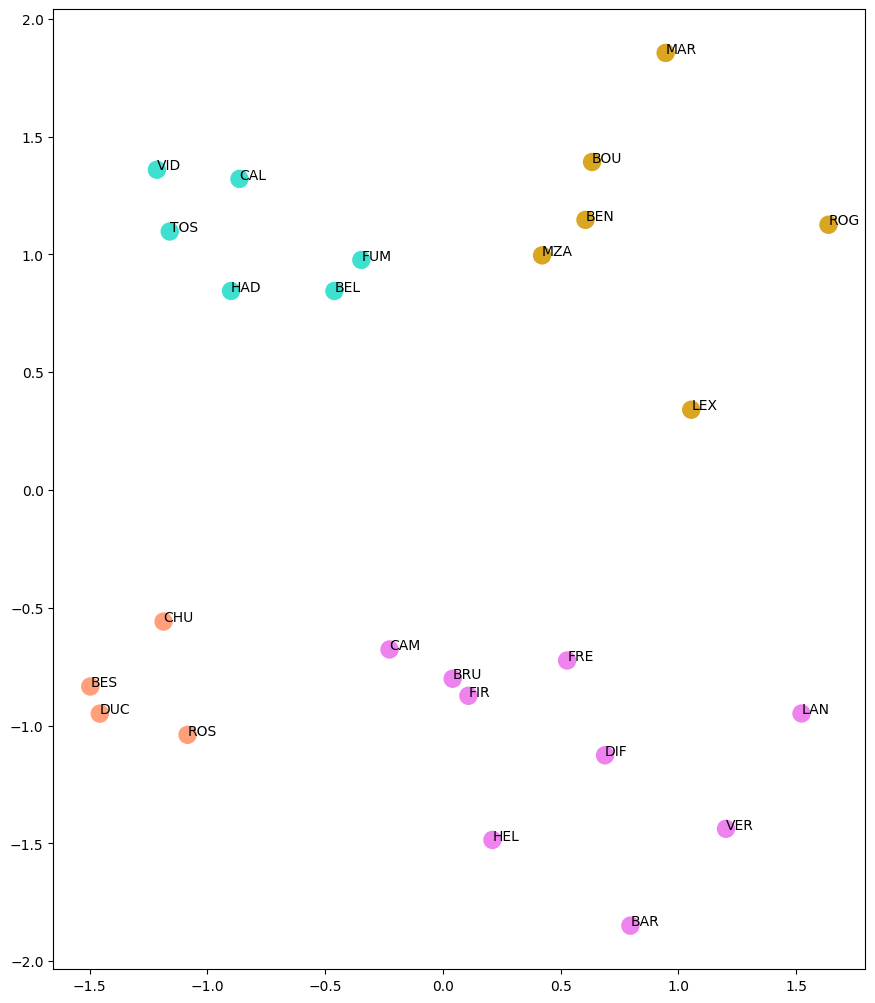

In [ ]:
#couleurs pour groupes d'appartenance
import numpy
couleurs_groupes = numpy.array(['turquoise','violet','goldenrod','lightsalmon'])[km.labels_]
#graphique avec les couleurs pour les groupes
ax = plt.axes([0,0,2,2])
ax.set_aspect(aspect='equal')
plt.scatter(points[:,0],points[:,1],color=couleurs_groupes,s=150)
for i in range(D.shape[0]): ax.annotate(D.index[i],(points[i,0],points[i,1]),color='black')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np


# Créez un tableau pour stocker les valeurs de silhouette
sil = np.zeros(5)

# Balayez les différentes valeurs de K
for K in range(2, 7):
    kms = KMeans(n_clusters=K, random_state=1).fit(points)
    sil[K-2] = silhouette_score(points, kms.labels_, metric='euclidean')

# Affichez les valeurs de silhouette
print(sil)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0.47240332 0.49295122 0.57465299 0.52895001 0.49251385]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


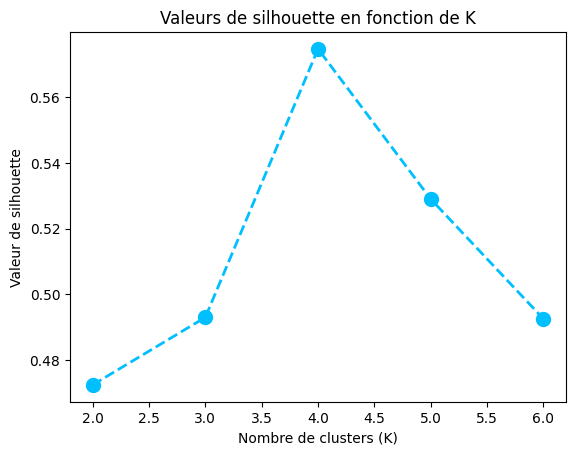

In [ ]:
import matplotlib.pyplot as plt

# Les valeurs de K (de 2 à 6) et les valeurs de silhouette 'sil' doivent déjà être définies

# Tracez le graphique
plt.plot(range(2, 7), sil, '--o', color='deepskyblue', linewidth=2, markersize=10)

# Ajoutez des étiquettes d'axe et un titre
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Valeur de silhouette')
plt.title('Valeurs de silhouette en fonction de K')

# Affichez le graphique
plt.show()


In [ ]:
segments = []

# Travailler sur la partie triangulaire de la matrice de dissimilarités
for i in range(0, D.shape[0] - 1):
    for j in range(i + 1, D.shape[0]):
        # Uniquement si la distance est nulle
        if (D.iloc[i, j] == 0):
            segments.append([points[i, :], points[j, :]])

# Nombre de segments concernés
print(len(segments))


37


In [ ]:
#1er segment concerné
print(segments[0])

[array([0.60523707, 1.1468044 ]), array([0.42104059, 0.99613963])]


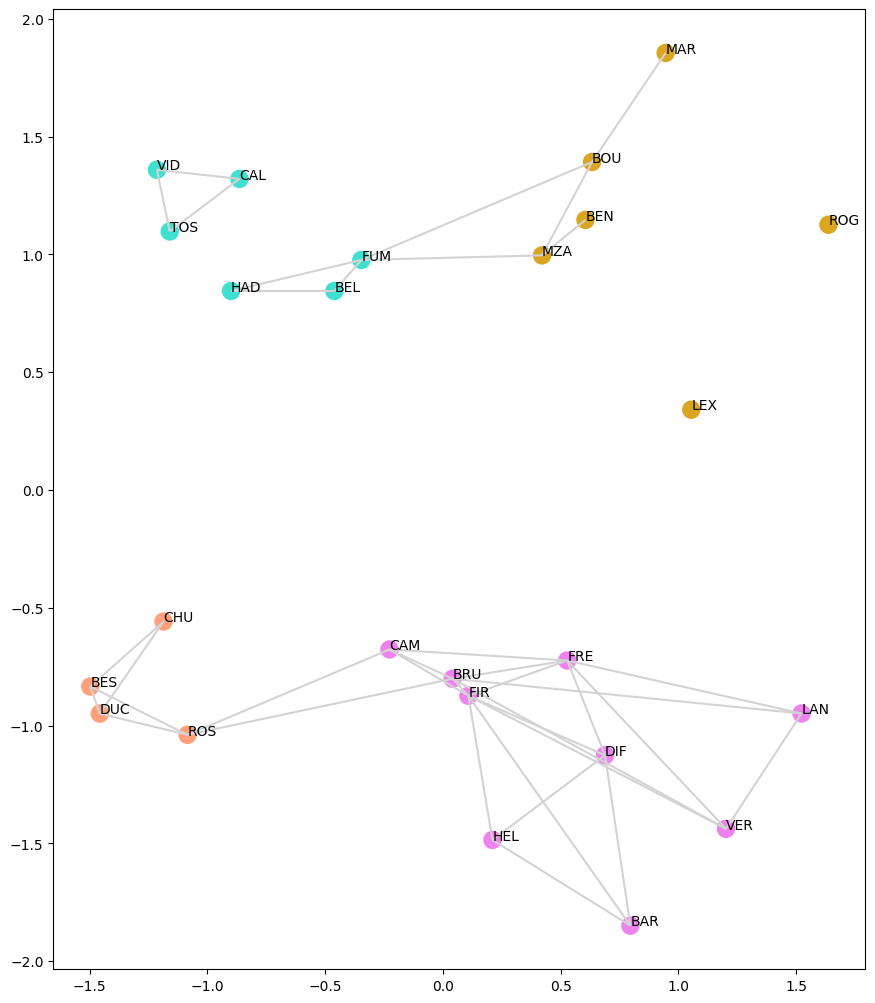

In [ ]:
#collection de lignes
from matplotlib.collections import LineCollection
lc = LineCollection(segments=segments,color='lightgray')
#graphique avec les couleurs pour les groupes et les segments des amis
ax = plt.axes([0,0,2,2])
ax.set_aspect(aspect='equal')
plt.scatter(points[:,0],points[:,1],color=couleurs_groupes,s=150)
for i in range(D.shape[0]): ax.annotate(D.index[i],(points[i,0],points[i,1]),color='black')
ax.add_collection(lc)
plt.show()

# Nouvelle section